# Sampling distributions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import pareto, uniform, norm, t, ttest_ind, ks_2samp, sem, bootstrap
%matplotlib inline

/opt/conda/envs/python_CS703_f22/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# PDF

In [6]:
pts = np.linspace(-3, 3, 100)
pts

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

/opt/conda/envs/python_CS703_f22/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

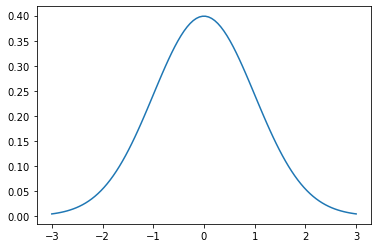

In [3]:
sns.lineplot(pts, norm().pdf(pts))

# CDF

/opt/conda/envs/python_CS703_f22/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

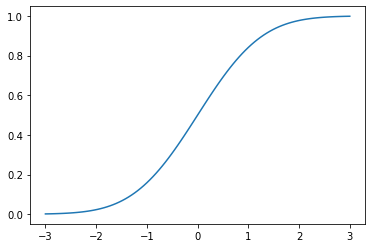

In [4]:
sns.lineplot(pts, norm().cdf(pts))

(4.969463503164285, 5.009125326638042)

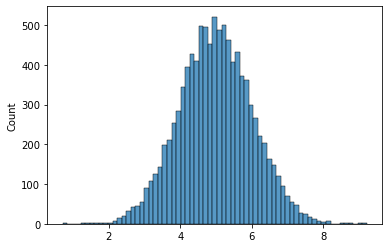

In [7]:
sample_pts = norm(5, 1).rvs(size=10000)
sample_error = sem(sample_pts)
confidence_interval = norm.interval(0.95, loc=sample_pts.mean(), scale=sample_error)
sns.histplot(sample_pts)
confidence_interval


In [8]:
z_table_lookup = norm.ppf((1 + .95) / 2)
z_table_lookup

1.959963984540054

In [9]:
sample_error = sem(sample_pts)
mean = sample_pts.mean()
(mean - z_table_lookup * sample_error, mean + z_table_lookup * sample_error)

(4.969463503164285, 5.009125326638042)

## Bootstrap sampling

In [10]:
bootstrap((sample_pts,), np.mean, confidence_level=0.95, n_resamples=100, method='percentile' )

BootstrapResult(confidence_interval=ConfidenceInterval(low=4.969569502531366, high=5.00987949831775), standard_error=0.010075928418675004)

# Sampling normal with uniform

In [22]:
uniform_pts = uniform(-3, 6).rvs(200)

In [23]:
uniform_pts

array([-2.97440139, -1.52078719,  1.2363371 , -2.6307557 , -1.23183901,
        2.92867652,  2.82733338, -0.10892167,  1.41416032,  0.79593465,
       -0.20584157,  2.1423986 , -1.96489049,  1.97059153, -2.74758286,
        2.20172215,  1.05597952, -0.32451534,  1.02942149, -0.23778898,
        1.68001933, -2.3193355 ,  0.04894457,  2.22893724,  2.56517565,
       -1.67798201, -1.48841818,  2.42407483, -0.92689597, -2.65876456,
        1.28932003, -0.51348685,  1.41194512, -0.1374502 ,  0.00339333,
       -0.49462854, -1.25709062,  2.4042652 ,  1.01272547,  1.73299406,
        2.37443719, -1.49886635,  2.51892368,  2.17563052,  0.03651157,
        0.40741304, -2.31040657,  1.57269504, -1.96064996,  0.20301625,
       -2.24137617, -2.56249744,  0.65416466, -0.05278122,  1.04885961,
        1.7451251 ,  2.89612496, -2.49551591,  0.78727267,  0.46184937,
        0.90385306,  0.25907673,  0.34420433,  2.2113278 , -0.2879303 ,
        0.20985347,  1.14578222, -2.46303005, -0.40844809, -2.38

/opt/conda/envs/python_CS703_f22/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

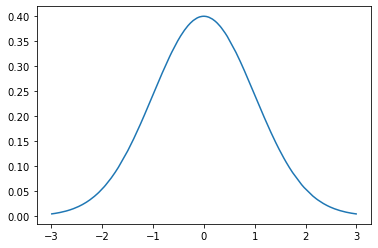

In [24]:
sns.lineplot(uniform_pts, norm().pdf(uniform_pts))

### Aside proving the Central Limit Theorem

In [56]:
sample_size = 1000
num_samples = 100
lots_of_uniform_samples = uniform(-40, 80).rvs((num_samples, sample_size))

In [57]:
lots_of_uniform_samples

array([[-15.74464318, -38.59942029,  36.43306553, ...,  15.7616303 ,
         -8.25309873,  15.88677257],
       [ 33.21774457,  33.59675348,  26.29873956, ...,  36.35202411,
          3.05015518,  29.3202447 ],
       [-12.14746924,  16.5879076 ,  11.07133015, ..., -25.59196238,
        -18.243376  ,  14.18091978],
       ...,
       [ 28.50478733,  15.20213327,  19.68110745, ...,  10.47714921,
         11.93633716,  33.52687782],
       [ 31.25504274, -36.66768071,  -2.55079042, ...,   8.01646759,
        -38.51982687,  36.74044415],
       [ 13.90723972,  -3.74419876,  22.96933951, ...,   0.4087546 ,
        -38.21957979,  22.42187817]])

In [58]:
means_samples = lots_of_uniform_samples.mean(axis=0)
means_samples

array([ 2.69517158e+00, -2.02694385e+00,  1.86953775e+00,  2.74320643e+00,
        1.07604724e+00, -2.94206346e+00, -1.09911005e+00,  6.34968205e-02,
       -2.41076537e+00,  1.27189618e+00, -1.94250733e+00,  3.06391656e+00,
       -3.89332450e-01, -4.67108306e-01,  2.35361720e+00,  6.19046528e+00,
        5.19937071e-01, -7.98985237e-01, -3.30560833e+00, -2.17829270e+00,
        4.38640605e+00,  4.67978316e-01,  3.73551122e+00,  3.59502396e-01,
       -1.65589132e+00,  1.92382830e+00,  7.07003915e+00, -2.72712927e-02,
        1.83910790e+00,  2.95015651e+00,  3.26692623e+00,  5.03462785e-02,
        1.35564948e+00, -2.68371791e+00, -1.36764276e+00, -4.61543303e+00,
       -2.52239950e+00,  6.04583837e-01, -2.54390050e+00,  6.39408972e-01,
       -3.20782573e-01,  2.13196806e-01,  2.43765202e+00, -4.28561878e+00,
        1.06085425e+00,  1.21236071e+00,  9.11503815e-01,  3.62325267e+00,
        2.06191547e+00, -3.39431962e+00, -2.56254571e+00,  4.27290020e+00,
        7.31588951e-01,  

<AxesSubplot:title={'center':'Means of 100 sample(s)'}, ylabel='Count'>

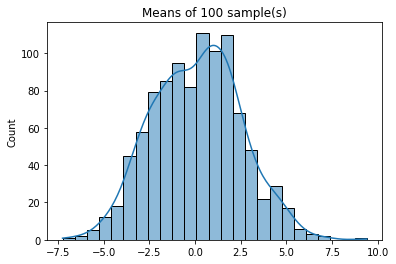

In [59]:
g = sns.histplot(means_samples, kde=True)
g.set_title(f'Means of {num_samples} sample(s)')
g

# Sampling Pareto distribution with normal

In [37]:
normal_pts = norm(2, 1).rvs(100)
normal_pts

array([ 2.0327096 ,  0.47732829,  1.89522384,  0.06299633,  0.9634824 ,
        2.54624513,  2.590583  ,  2.56197417,  2.8939935 ,  2.63212998,
        1.98935528,  3.24545522,  1.45488856,  2.01130426,  2.59657501,
        1.89848586,  1.55336392,  0.96471319,  2.46124071,  2.04717065,
        2.97464022,  2.12634174,  3.81278275,  4.19840127,  2.67001196,
        2.39003864,  1.78236188,  2.37602208,  2.88880753,  3.47889092,
        0.31025359,  1.36687877,  2.13250109,  2.93850795,  1.1275296 ,
        1.90804761,  1.73383341,  0.77412687,  3.12852208,  1.08731061,
        1.69756629,  1.75546585,  2.2521891 ,  1.87919858,  2.41697446,
        3.17638804,  3.07059991,  1.32382848,  1.71303622,  0.44084606,
        2.88214466,  0.84662738,  3.67146315,  2.46833074,  1.52411723,
        1.5283787 ,  2.08928365,  2.74245569,  3.33384737,  2.50712045,
        2.2817559 ,  2.67109696,  3.41248914,  0.39533208,  3.68710286,
        0.73197747,  0.8964649 ,  0.94140089,  2.34841229,  1.94

/opt/conda/envs/python_CS703_f22/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

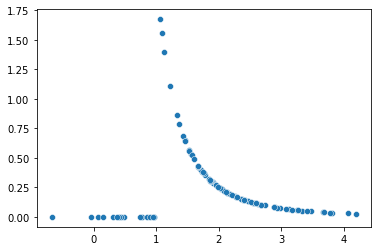

In [38]:
sns.scatterplot(normal_pts, pareto(2).pdf(normal_pts))

# Sampling 2 dimensions

In [39]:
angles = uniform(0, 2 * np.pi).rvs(1000)
angles

array([2.42795119, 0.60169458, 4.20231072, 4.9816858 , 1.39452877,
       0.91280874, 2.62140535, 4.95556495, 5.65467808, 5.75178636,
       5.21409227, 2.00747396, 1.54882776, 4.96358515, 2.1690063 ,
       1.59298144, 0.432445  , 4.75231302, 1.39188785, 0.59822227,
       1.88290409, 3.94176836, 0.80626294, 5.83168146, 0.89621506,
       4.84220206, 3.05321248, 2.86716253, 1.20129607, 0.30334407,
       1.26500334, 2.36490456, 5.15640861, 2.16591718, 3.26169107,
       4.91200738, 0.88848627, 1.35118456, 2.37952881, 5.99918813,
       1.60541204, 0.0145434 , 1.7122421 , 3.38364571, 3.58799234,
       4.264147  , 4.39318714, 5.52873337, 0.59520963, 2.82753035,
       2.70996693, 1.13031761, 4.69724109, 3.62033108, 1.97213498,
       4.02145033, 2.56915536, 4.69178682, 0.95236169, 4.54732545,
       3.48288464, 1.36952213, 1.83628956, 3.72926848, 2.50330199,
       6.12447406, 4.77465988, 5.61575641, 1.12905986, 2.59680303,
       5.39352987, 2.90126461, 2.99754204, 0.29699214, 3.46892

In [40]:
radii = uniform().rvs(1000)
radii

array([1.08114391e-01, 1.43391387e-01, 3.63922621e-01, 9.67891036e-01,
       2.60034348e-01, 5.09876686e-01, 9.86184947e-01, 7.75842379e-01,
       4.51378462e-01, 3.36720314e-01, 7.98711599e-01, 3.72506234e-01,
       5.30239742e-01, 2.60450085e-01, 8.03049378e-01, 7.44814799e-01,
       8.17997289e-01, 4.21636686e-01, 5.87452320e-01, 6.92097405e-01,
       8.81535066e-01, 7.84659659e-01, 5.14319803e-01, 4.94159120e-01,
       7.71204444e-01, 9.30328055e-01, 6.74893359e-01, 3.33410568e-01,
       2.86962142e-01, 9.83540239e-01, 8.84987037e-01, 8.22640643e-01,
       1.81672395e-01, 4.73398196e-01, 9.40799932e-02, 9.06798716e-01,
       5.06963877e-02, 5.23371821e-01, 4.04718501e-01, 4.61425351e-01,
       9.82850541e-01, 5.60907062e-02, 1.79496293e-01, 5.50733898e-02,
       9.58597510e-01, 7.88390649e-01, 7.19902973e-01, 4.93912599e-02,
       2.91830163e-01, 8.89338019e-01, 5.65804268e-01, 5.85622559e-01,
       7.42160654e-01, 5.24091875e-03, 9.37945547e-01, 1.82771402e-02,
      

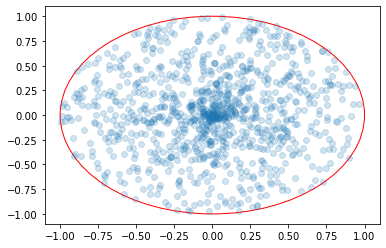

In [41]:
fig, ax = plt.subplots()
ax.plot(radii * np.cos(angles), radii * np.sin(angles), 'o', alpha=0.2)
ax.add_patch(plt.Circle((0, 0), 1, color='r', fill=False))

# Monte Carlo Sampling

In [42]:
samples = pd.DataFrame(uniform(-1, 2).rvs((1000, 2)), columns=['x', 'y'])
samples

,x,y
0,-0.437084,-0.666757
1,0.050096,0.727984
2,0.644424,0.165950
3,0.650707,0.950846
4,0.865723,0.662605
...,...,...
995,-0.145516,-0.924254
996,-0.445402,-0.579810
997,-0.374835,0.726760
998,0.815004,0.787064


In [43]:
samples['within'] = samples.apply(lambda row: np.sqrt(row[0] ** 2 + row[1] ** 2) <= 1.0, axis=1)
samples

,x,y,within
0,-0.437084,-0.666757,True
1,0.050096,0.727984,True
2,0.644424,0.165950,True
3,0.650707,0.950846,False
4,0.865723,0.662605,False
...,...,...,...
995,-0.145516,-0.924254,True
996,-0.445402,-0.579810,True
997,-0.374835,0.726760,True
998,0.815004,0.787064,False


In [44]:
within_samples = samples[samples['within']]
outside_samples = samples[~samples['within']]

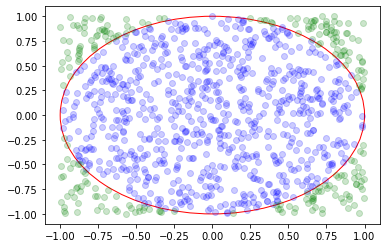

In [45]:
fig, ax = plt.subplots()
ax.plot(within_samples['x'], within_samples['y'], 'o', color='b', alpha=0.2)
ax.plot(outside_samples['x'], outside_samples['y'], 'o', color='g', alpha=0.2)
ax.add_patch(plt.Circle((0, 0), 1, color='r', fill=False))

# T-test

$$t = \frac{\bar{x_1}-\bar{x_2}}{\sqrt{\frac{\sigma_{1}^{2}}{n_1} + \frac{\sigma_{2}^{2}}{n_2}}}$$

# Playing with values

t-value:  24.56265830389922
Alpha 5.517008259430968e-133
Accept alternative:  True


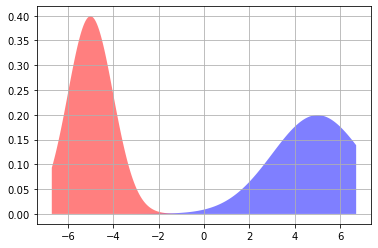

In [61]:
mean = 0
diff = 5
std_diff = 1
std = 1

x = np.linspace(norm.ppf(0.00000000001), norm.ppf(0.99999999999), 100000)

mu_1 = mean - diff
mu_2 = mean + diff

std_1 = std
std_2 = std + std_diff
y1 = norm.pdf(x, mu_1, std_1)
y2 = norm.pdf(x, mu_2, std_2)
plt.fill_between(x, y1, facecolor='red', interpolate= True, linewidth=0, alpha=0.5)
plt.fill_between(x, y2,facecolor='blue', interpolate= True, linewidth=0, alpha=0.5)


plt.grid()

t_value, alpha = ttest_ind(y1, y2, equal_var=False)
    
print("t-value: ", t_value)
print("Alpha", alpha)
print("Accept alternative: ", alpha <= 0.05)

KS stat 0.16
Alpha 0.1548386665118475
Accept alternative:  False
KS Test max difference:  27


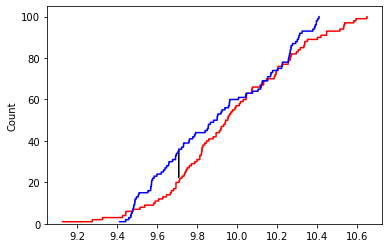

In [18]:
mu = 10
sigma = 0.3 
N = 100

np.random.seed(3)
s = np.random.normal(mu, sigma, N)
#np.random.seed(31)
#s2 = np.random.normal(mu, sigma, N)
s2 = np.random.uniform(9.41, 10.43, 100)

nbins = 10000

hist1, bin_edges1 = np.histogram(s, nbins)
hist2, bin_edges2 = np.histogram(s2, nbins)
cdf_hist1 = np.cumsum(hist1)
cdf_hist2 = np.cumsum(hist2)

diff = np.abs(cdf_hist1 - cdf_hist2)
max_diff = max(diff)
argmax_diff = np.argmax(diff)


g1 = sns.histplot(s, bins=nbins, cumulative=True, element='step', color='red', fill=False)
g2 = sns.histplot(s2, bins=nbins, cumulative=True, element='step', color='blue', fill=False)

if cdf_hist1[argmax_diff] > cdf_hist2[argmax_diff]:
    g1.axes.arrow(bin_edges1[argmax_diff], cdf_hist1[argmax_diff], 0, max_diff / 2, length_includes_head=True, color='black')
else:
    g2.axes.arrow(bin_edges2[argmax_diff], cdf_hist2[argmax_diff], 0, -max_diff / 2, length_includes_head=True, color='black')

ks_stat, alpha = ks_2samp(s, s2)
print("KS stat", ks_stat)
print("Alpha", alpha)
print("Accept alternative: ", alpha <= 0.05)

print("KS Test max difference: ", max_diff)